In [16]:
import sys
import os
import matplotlib.pyplot as plt
import numpy as np
import scipy as sp
import json

In [123]:
flex_dir = "oct21_times_4/dynamic/"
minimal_dir = "oct21_times_4/min/"
maximal_dir = "oct21_times_4/max/"

In [124]:
def string_to_list(string):
    string = string[1:-1]
    string = string.replace(" ", "")
    res = string.split(",")
    return [float(x) for x in res]    

def combine_lists(attribute_list, folder_name):
    res = []
    for file in attribute_list:
        with open(folder_name+file, "r") as infile:
            data = infile.read()
            res.append(string_to_list(data))
    return res

def mean_min_max(list_of_lists):
    _mean = []
    _min = []
    _max = []
    for elements in zip(*list_of_lists):
        _min.append(min(elements))
        _max.append(max(elements))
        _mean.append(sum(elements)/len(elements))
    return _mean, _min, _max  

In [125]:
def plot_in_between(mean_min_max_list):
    _x = list(range(len(mean_min_max_list[0])))
    _y_mean = mean_min_max_list[0]
    _y_min = mean_min_max_list[1]
    _y_max = mean_min_max_list[2]
    plt.plot(_x, _y_mean)
    plt.fill_between(_x, _y_min, _y_max, alpha=0.3)
    plt.show()

def plot_by_metric(metric):
    metric_list_flex = [path for path in os.listdir(flex_dir) if metric in path]
    metric_list_min = [path for path in os.listdir(minimal_dir) if metric in path]
    metric_list_max = [path for path in os.listdir(maximal_dir) if metric in path]
    
    _y_flex_mean, _y_flex_min, _y_flex_max = mean_min_max(combine_lists(metric_list_flex, flex_dir))
    _y_min_mean, _y_min_min, _y_min_max = mean_min_max(combine_lists(metric_list_min, minimal_dir))
    _y_max_mean, _y_max_min, _y_max_max = mean_min_max(combine_lists(metric_list_max, maximal_dir))
    _x = list(range(len(_y_flex_mean)))
    
    plt.plot(_x, _y_flex_mean, color="blue")
    plt.plot(_x, _y_min_mean, color="green")
    plt.plot(_x, _y_max_mean, color="red")
    
    plt.fill_between(_x, _y_flex_min, _y_flex_max, alpha=0.3, color="blue", label="dynamic")
    plt.fill_between(_x, _y_min_min, _y_min_max, alpha=0.3, color="green", label="min")
    plt.fill_between(_x, _y_max_min, _y_max_max, alpha=0.3, color="red", label="max")
    plt.legend(loc="best")
    plt.title(metric)
    
    plt.show()
    
    
def plot_trajectory(last_ten_trajectories):
    for run in last_ten_trajectories:
        _xs = []
        _ys = []
        for coordinate in run[:-1]:
            _xs.append(coordinate[0])
            _ys.append(coordinate[1])
        plt.plot(_xs, _ys)
    plt.show()
    
    
def plot_distribution(last_ten_distributions):
    for run in last_ten_distributions:
        run = sum(run, [])
        _xs = list(range(len(run)))
        _ys = []
        
        for coordinate in run:
            _ys.append(coordinate)
        plt.plot(_xs, _ys, linestyle="dotted")
    plt.axhline(y=0, color='b', linestyle='--')
    plt.show()
                 
    

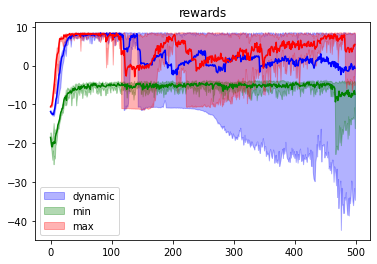

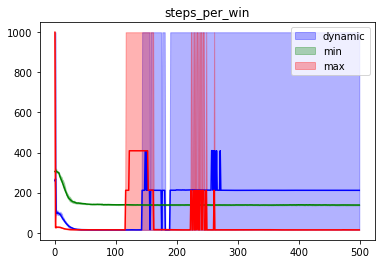

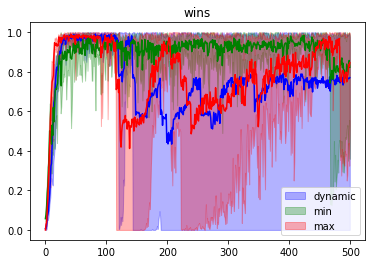

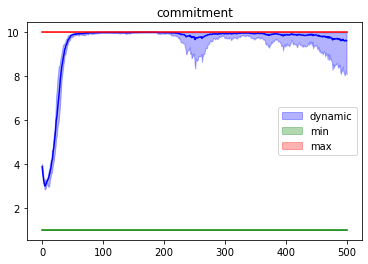

In [126]:
plot_by_metric("rewards")
plot_by_metric("steps_per_win")
plot_by_metric("wins")
plot_by_metric("commitment")

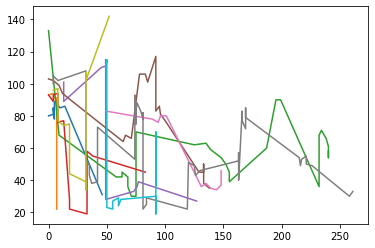

In [127]:
test_str="[[[0, 80], [4, 81], [4, 85], [5, 78], [5, 89], [10, 85], [14, 86], [46, 31], [0, 100]], [[0, 93], [4, 94], [7, 88], [7, 91], [7, 22], [0, 100]], [[0, 133], [9, 68], [58, 42], [63, 42], [63, 45], [68, 42], [68, 36], [71, 30], [75, 30], [75, 34], [75, 70], [125, 62], [135, 63], [139, 59], [148, 54], [152, 50], [155, 45], [155, 39], [187, 60], [195, 90], [199, 90], [232, 36], [232, 64], [232, 68], [234, 71], [238, 66], [240, 61], [240, 54], [240, 58], [0, 100]], [[0, 93], [4, 89], [4, 93], [8, 94], [8, 88], [8, 82], [8, 76], [13, 77], [18, 28], [18, 22], [28, 20], [33, 19], [33, 58], [38, 55], [83, 45], [0, 100]], [[13, 101], [13, 89], [45, 110], [49, 111], [49, 115], [49, 103], [49, 96], [49, 34], [49, 28], [73, 33], [76, 36], [77, 39], [127, 27], [0, 100]], [[0, 103], [4, 102], [9, 99], [12, 94], [17, 91], [64, 64], [66, 68], [71, 66], [78, 106], [83, 106], [85, 101], [92, 117], [92, 83], [95, 86], [96, 81], [100, 77], [129, 45], [133, 45], [133, 50], [133, 44], [133, 38], [138, 35], [0, 100]], [[49, 83], [89, 78], [94, 76], [96, 80], [101, 80], [131, 36], [135, 38], [139, 35], [144, 34], [148, 37], [148, 41], [148, 46], [0, 100]], [[4, 100], [4, 105], [8, 102], [32, 108], [32, 53], [35, 49], [35, 43], [37, 38], [42, 39], [42, 73], [74, 53], [74, 93], [75, 87], [75, 75], [75, 80], [75, 84], [76, 88], [79, 83], [81, 78], [81, 82], [81, 22], [84, 25], [84, 29], [119, 22], [120, 51], [125, 49], [126, 43], [130, 46], [163, 52], [163, 57], [163, 40], [166, 83], [166, 77], [169, 72], [169, 76], [169, 81], [169, 85], [169, 79], [215, 54], [216, 49], [217, 53], [221, 55], [221, 50], [226, 49], [231, 46], [258, 30], [261, 33], [0, 100]], [[4, 96], [8, 97], [8, 77], [13, 74], [18, 75], [18, 44], [32, 39], [32, 34], [32, 59], [32, 107], [32, 102], [52, 142], [0, 100]], [[49, 110], [50, 115], [50, 80], [50, 75], [50, 23], [55, 22], [55, 27], [60, 29], [60, 24], [62, 28], [92, 30], [92, 19], [92, 24], [92, 70], [92, 37], [0, 100]]]"

plot_trajectory(json.loads(test_str))

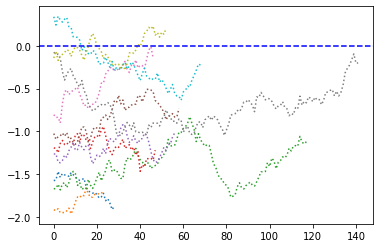

In [128]:
test_distri="[[[-1.5782472617646843, -1.5702936167898298, -1.4703125511128008], [-1.5401310750473884], [-1.4947918349681601], [-1.5112339787675004], [-1.513799032979029, -1.5278391302441285, -1.4848396978802514], [-1.5084313230061073], [-1.5351278783725149], [-1.5617994684690912, -1.5745251743584283, -1.5651077358096805, -1.5525823446659335, -1.652142822677622, -1.7018484719147153, -1.7109615400524603, -1.7246233151019732, -1.7149099112080588, -1.7413672925136243], [-1.7813205501318559, -1.7688411790753733, -1.7268702325582814, -1.8129570269700663, -1.7882033145952259, -1.8426299685930794, -1.9161311729144912, -1.8801399023956598]], [[-1.9195070354751782], [-1.9286764724044436], [-1.9060497791284878], [-1.952262747594594], [-1.9514151323726179, -1.9530269602594994, -1.931909147424752, -1.8997990387545927, -1.967684889116023, -1.9106319902595676, -1.826480317393374, -1.7694287156987385, -1.7784202520225425, -1.7451995578886943], [-1.7550732173031691, -1.666919658928013, -1.732808338838841, -1.773334171881178, -1.7709433759474043, -1.739939807933996, -1.7269682637961774, -1.7351728528437311, -1.7295521625467898, -1.6928895360620602]], [[-1.6742629382890493, -1.6694422676278258, -1.6205626348897362, -1.6861254773019647, -1.6159774098909532, -1.6012597476260702, -1.6608586861523273, -1.6014198077348811, -1.5138152485087062, -1.4698069589117746], [-1.4951833159201464, -1.6336068750628012, -1.6003865856146857, -1.6830176147168836, -1.659857619845572, -1.6698844467071998, -1.5633547557694438, -1.6307881599005216, -1.6695957429552535, -1.6125261610874033], [-1.5453200927711925, -1.4794541461340818, -1.5799138105570356, -1.518873489685748, -1.4625877199628041, -1.3530404414417694, -1.3383958874098862, -1.4753509548427919, -1.455417627354969, -1.4534241007410813], [-1.5034011083259753], [-1.550947567987306], [-1.5544111213645466], [-1.3893295122114995], [-1.3113856227455116], [-1.3371173530933786], [-1.3181037441543075], [-1.267441488394559, -1.2013881066278156, -1.28470220147507, -1.3330061037606369, -1.3601134324274495, -1.3976316226624839, -1.367473380611162, -1.3746159879480238, -1.4365988856385847, -1.4103050771193892], [-1.4011806553708461, -1.390397886184513, -1.308269608446257, -1.3098033730974534, -1.2697795367303972, -1.2234631137565777, -1.0956153494565926, -1.1760791779726119, -1.1651887589420498, -1.1636606206534936], [-1.0933071902627667, -1.0099569874971643], [-1.0138926131745527], [-0.9681071079632476, -0.9484188280456958], [-0.9030288790347731], [-0.8300054383722604], [-0.9082083554068119], [-0.9793914752505428, -1.1207210790706639, -1.029086551975684, -1.10116563363123, -1.1385307300978444, -1.175416589051453, -1.1569755932247605, -1.1648595712500742, -1.2691576501591075], [-1.384129708464888, -1.4182943213875794, -1.5050626771389628, -1.5521495700407413, -1.5617136468998458, -1.6183019061350072, -1.6320431100515163, -1.6751387906863902, -1.7718455657842274], [-1.7599198164786927], [-1.7453801035356333, -1.6498835895748887, -1.6035402050433472, -1.6617914607970263, -1.6762994002066496, -1.6363456945306973, -1.6142243212253535, -1.5953120923848028, -1.6314889840166384, -1.6425038676914068], [-1.5911850987685432, -1.5349479280551765, -1.4744245849299467, -1.4764497671214283, -1.4711996037611728, -1.3663866578798602, -1.4124125742317066, -1.3146165809688386], [-1.3469371541077724], [-1.4383055014643533], [-1.363625141970373], [-1.3444799611684415], [-1.2996991383551544], [-1.3117301554478054], [-1.2824078130326408, -1.1984204630717659, -1.2305417106316772, -1.1728092440792852, -1.1679039281618033, -1.1764218588962552, -1.0603762892438495, -1.1276619385179807, -1.148283129584505, -1.1230350738067392]], [[-1.1943523776343312], [-1.2020409480102903], [-1.2522029076479673], [-1.1417170936484253], [-1.1073869945786647], [-1.155823655663821], [-1.1580227088493542], [-1.1160091588407186], [-1.1371551557410653, -1.150511639185858, -1.0419689654863578, -1.0289980929227402, -1.1280751245127436, -1.0337295000804172, -1.0493981671342434, -1.1010267096971653], [-1.0983954824930842], [-1.2022927128005718, -1.12760949059509], [-1.0680304903352213], [-1.0498836482801508, -1.0716754211801116, -0.9838262227129483, -0.9448740910256479, -1.0484797110065551, -1.1601318286294806, -1.2296319187989975, -1.2741829058206124, -1.20671882818307, -1.1756591383887383], [-1.1892764220430925], [-1.1399999234695781, -1.0943577558354138, -1.2008066164646258, -1.1763006211989202, -1.157575217894993, -1.2205345175486726, -1.1871539117866823, -1.2811754546250564, -1.2301845415501615], [-1.4690414815028783, -1.3924284358519894, -1.4210793846009018, -1.3192324148255095, -1.3223379940632904, -1.3166114780202773, -1.3378058946508187, -1.2225298922106287]], [[-1.2672963337517316, -1.2639191322999892, -1.3631728871704798], [-1.368377852854399, -1.342295183213813], [-1.27752144157055, -1.3041944542751962, -1.2275206110386714, -1.1875091319880213, -1.129412976666976, -1.2230777103289767, -1.214778184969144, -1.1302641532238624, -1.1885365439496456], [-1.2168649814120398], [-1.1671527858554192], [-1.1589539419802897, -1.2964100699799923], [-1.3806110597690475], [-1.3376736042091113, -1.2792759821863042, -1.297492424717312, -1.2795779342753097, -1.199203086034447, -1.2637121667398277, -1.1358437958546381, -1.0839158496952992, -1.109674656694154, -1.1242830960618737], [-1.0804961830568198], [-1.0440154202137006, -0.9663804142151513, -0.9231077832450136, -0.9374967996419824, -1.0548016264602285], [-1.1307029027514868], [-1.1169684450996165], [-1.0529844436780718, -1.1149508619114181, -1.1429113712120942, -1.0912193884099564, -1.086193891107325, -1.0228501815442532, -1.0457185850176467, -1.126287214013627, -1.2401132601059, -1.329974993183344], [-1.3676934641250602, -1.3560072015948292, -1.3067116111836232, -1.253440877687845, -1.188696277113591, -1.2264133270857223, -1.1557077731755359, -1.1505510512790735, -1.066245596794395, -1.0192199202401626]], [[-1.0274081342663162], [-1.0947223392844094], [-1.063459383773218], [-1.053424983253581], [-1.0217402163008553], [-1.0588197605596394, -1.0155427709651539, -1.0928517203237043, -1.0820740508916282, -1.1309336579995466, -1.152629711231639, -1.1193789185960363, -1.04318481285182, -0.9513601691166496, -0.9514667487395678], [-1.0007188223952523], [-1.1323849044679937], [-1.0838371269596068, -0.9845271065683352, -0.9519750516710277, -0.9637930956505891, -1.0034375948516856, -0.85251374299669, -0.8362416909318007, -0.8092894630393145, -0.8625041681135044, -0.823912256159633], [-0.7492773461383022], [-0.648479449174538], [-0.6674489518307841, -0.5793553093448263, -0.6791897970170976, -0.6348480566258019], [-0.7568510649752187, -0.7206443318050162, -0.7198261320223758, -0.6938854067987523, -0.6777670703752472, -0.6851639212620213], [-0.5810571150775481], [-0.5950103407038468], [-0.6559903114361539], [-0.5877531999447467, -0.5127804719642715, -0.5056055825983794, -0.5178493530517295, -0.5351116401634128, -0.64028745665424, -0.6643061560212183, -0.6902667506467377], [-0.7357864515527124], [-0.7729030972453015], [-0.8658053192058387], [-0.8203426379178986], [-0.8210838023043714], [-0.7937417131781705, -0.8341194416844093, -0.8333914553902667, -0.7327842668543352]], [[-0.8060959672770772, -0.839392697084167, -0.8358646026886243, -0.9029592202409792, -0.6752627211762653, -0.539422558464953, -0.5145271189267563, -0.570504822749647, -0.5413144249413542, -0.5194981630757539], [-0.5033755323759321, -0.4834198288733165, -0.5659411848875954, -0.6277556399044424, -0.703525178722425, -0.6897749001165838, -0.7338961004887419, -0.6951788803019999], [-0.6841558774757319], [-0.6790956266402984], [-0.6263908930962461], [-0.5568867994143544, -0.43781299009042507, -0.4390671083365179, -0.33049155510817246, -0.29674105860272704, -0.2598091138269752, -0.2479853358608696, -0.2991939521263398, -0.2632232091489481, -0.2865158972524021], [-0.2425217368124387], [-0.22067910474423963], [-0.1822850663226832], [-0.27506673963884626], [-0.31287873715589853], [-0.22613506241610243], [-0.24130355676534715, -0.16539545722025634, -0.25886943840479715, -0.2274413725714138, -0.23207169074201417, -0.2688180075616717, -0.15808597277440042, -0.04908709479094226, -0.010690416515789504, -0.1405656969830605]], [[-0.07512932341355617], [-0.10001038553308754], [-0.0978417675526003], [-0.14859578087491104, -0.30228863496039815, -0.40020786672600084, -0.3350272315480614, -0.28825798287500204], [-0.2661056682333294, -0.3501649563256575, -0.39276209727338784, -0.45070012937741993, -0.48042286982242877, -0.40718997629982073, -0.5251471425110781, -0.5688831339205486, -0.681821807376183, -0.7233195833266369], [-0.7616771873485522], [-0.745821285844002], [-0.7199094186915582], [-0.7016193550978106], [-0.6874821251024126, -0.6989217107147229, -0.6849867138542294, -0.6650029925562544, -0.6857198826961919, -0.7482039025046489, -0.8585263306352577, -1.0192485032175334], [-1.0327292202937135, -1.054541917842538, -1.0130452719381446, -0.9346784176578645, -0.8970821148200064, -0.9280360901343365, -0.9776892665385003], [-0.9012024069127028, -1.0072728789547016, -1.0081598357286419, -1.019783544548666, -1.01135041701967, -1.0238191576727922, -1.0482506870021822, -0.9285109262584543, -0.9570914365687027, -0.9041615949676265], [-0.903363818350407], [-0.9061778784485472, -0.9377315058633313], [-0.8543104831220008], [-0.8362362402960086], [-0.7515535490767167], [-0.8001196664267316], [-0.838908930334156], [-0.8850909416116632], [-0.8810259115433622, -0.9053653027258093, -0.8573274294183881, -0.8747092244020741, -1.0095527601028382, -0.9691256779327639, -0.9409508290665476, -1.026541764708174, -1.0373394070089, -1.023628581598757], [-0.9421070070673512], [-0.8913689627720489], [-0.8927567521263097, -0.9572251065908768, -0.8660087215842782, -0.8448462321109618, -0.8203058899095094, -0.8712153266322358, -0.823003701111712], [-0.8409525564920914, -0.870062352885412, -0.9358603273029578, -0.9691536257563522, -1.0492649667374625, -0.9839922611119056, -0.9174400776126048], [-0.8129036388844545], [-0.8002973247675014], [-0.7949106410982479], [-0.7562966179592929, -0.7706025950882464, -0.7323653386166254, -0.6594162934562222, -0.6591251304119838, -0.6293122073098754, -0.6608138328507641], [-0.6943812595030057], [-0.7709387738813174, -0.5974075861457531, -0.6059010383390282], [-0.5453931966933041, -0.5833230131792855, -0.6319036695885167, -0.6144016924890836, -0.6213441334913679, -0.6488855600575014, -0.7026953158246241, -0.7397199930335824, -0.7024895741293316, -0.695940157876038], [-0.6545971136814037], [-0.7209545436554172], [-0.7363940130245414], [-0.8186020010014188], [-0.7907914143484615], [-0.8057943912118035], [-0.7235724614840962, -0.7389261812617067, -0.5898042661361896, -0.6940603248199035, -0.6495128622527876, -0.6674098421559514, -0.5987170405376527, -0.6153171387107609, -0.6539674595741322, -0.601772743133814], [-0.6347784798388345], [-0.6288445385015861], [-0.6885467291002864], [-0.6378810910985893], [-0.5446140765207319], [-0.5422204824067105], [-0.5226739134932149, -0.5112908382552691, -0.586373814470673, -0.5311976857451752, -0.587412390965971, -0.5451982430499522], [-0.46103932112329443], [-0.31390692960429056, -0.2634956522996069, -0.22601809470234557, -0.16340006234136228, -0.09490084251592427, -0.20412173914828377, -0.19972140006125305]], [[-0.14292306702315388], [-0.06327208379765747], [-0.17103028956265687, -0.10855449011598348, -0.1014321813072254, -0.07810728886118971], [-0.04466578071212067], [-0.059445162575764876], [-0.12523372813599787, -0.0541419424796718, -0.012115608465352784, -0.021827014080089698, -0.05294334596449565, -0.11201728609811232], [-0.16737135461137645, -0.08012976075443873, -0.006223657373215438], [0.09102896059100604], [0.14527149258694766, 0.09238695944408455, -0.013067435328734146, -0.031207970329351048, -0.06754271192668508], [-0.15180712965956022, -0.10092509953703535, -0.1277050069106851, -0.18173988249690837, -0.21706932537594686, -0.23097651834369864, -0.21067580255410123, -0.21445571010095932, -0.25837772795127384, -0.21925943777634668], [-0.284612730000797], [-0.2021977826899779, -0.08488362632657975, -0.07137242048143436, -0.08836310441667805, -0.04936963191646348, 0.018994086137871652, -0.0065234691369798715, 0.04652220013115936, 0.14448802105498562], [0.16742906540175684, 0.21621666511645057, 0.19526197793384253, 0.23135256650439068, 0.12610467861709926, 0.15698301042781412, 0.10114080600583723, 0.160877767517895, 0.13533307356452368, 0.20165932365095357]], [[0.34006939538452813, 0.24304477792674012, 0.34608637237775297, 0.303165629821508, 0.2775517834804381, 0.3109893836280923, 0.33190369991420343, 0.22381332509357604, 0.21519508633219336, 0.10561672815542933], [0.10247670930825217], [0.09854488624689747, 0.0666411170534566, -0.05554233610808959, -0.009238792741746393, -0.07479057670558475, -0.09075072167880643, -0.10036972068414908], [-0.054450428308408766], [-0.06998830959304009, -0.1359512234373389, -0.21625910658386976, -0.20699558866159812, -0.20280133015779206, -0.13432779352922355, -0.18972881827646218, -0.2573099178745112, -0.18387503148114967, -0.28965127600107077], [-0.25675193922758427], [-0.2622636830375468], [-0.28272492579855446], [-0.22092450479528647], [-0.19149342347433423], [-0.2705923860452174, -0.23630290244481003, -0.19011460717840023, -0.21422666535249613, -0.28844757460205395, -0.3445446194437088], [-0.40721367046482404, -0.3255520145916465], [-0.2618754638741886], [-0.35398740633340997, -0.3754544949543973, -0.4007648621190291, -0.3862652714160659, -0.3910451072994973, -0.3180961857218775, -0.4233367691964699, -0.39503846717876295, -0.434251030875082, -0.4952524081811276], [-0.5592621983809059, -0.5091688367295968, -0.4525815797424077, -0.5575568610029515, -0.5867182206948744, -0.5912662024449283], [-0.6370228012036574, -0.5393075836260364, -0.5205326375250547, -0.47158814310472724, -0.4832298658602388, -0.39911578528530606, -0.3490320714583572, -0.28483376939922234, -0.21367698499955934, -0.22560621463983646]]]"
plot_distribution(json.loads(test_distri))